In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import scale

# Descripción

Contamos con los datos de temperatura y humedad de varios aparatos eléctricos y electrónicos -appliances- de varios hogares de una región de Bélgica recolectados por cuatro meses y medio cada 10 minutos. 

Queremos predecir el consumo de energía en Wh que un aparato eléctrico/electrónico tendrá en cierto momento, esta variable corresponde a la variable -appliances-.

El conjunto de datos tiene las siguientes variables:

* date: Año, mes, día, hora, minuto y segundo del evento
* appliances: Energía utilizada en Wh
* lights: Energía utilizada en luz por la casa en Wh
* T1: Temperatura en la cocina en grados celsius 
* RH_1: Humedad en la cocina en porcentaje 
* T2: Temperatura en la sala en grados celsius
* RH_2: Humedad en la sala en porcentaje
* T3: Temperatura en el cuarto de lavado en grados celsius
* RH_3: Humedad en el cuarto de lavado en porcentaje
* T4: Temperatura en el cuarto de oficina en grados celsius
* RH_4: Humedad en el cuarto de oficina en porcentaje
* T5: Temperatura en el baño en grados celsius
* RH_5: Humedad en el baño en porcentaje 
* T6: Temperatura afuera del edificio (lado norte) en grados celsius
* RH_6: Humedad afuera del edificio (lado norte) en porcentaje
* T7: Temperatura en el cuarto de planchado en grados celsius
* RH_7: Humedad en el cuarto de planchado en el porcentaje
* T8: Temperatura en el cuarto de hijo 2 en grados celsius
* RH_8: Humedad en el cuarto de hijo 2 en porcentaje
* T9: Temperatura en el cuarto de los padres en grados celsius
* RH_9: Humedad en el cuarto de los padres en porcentaje
* To: Temperatura externa (de la estación de clima Chiervres) en grados celsius
* Pressure: Presión en mm Hg desde la estación de clima Chievres
* RH_out: Humedad externa desde la estación de clima Chievres en porcentaje
* Wind speed: Velocidad del viento en m/s desde la estación de clima Chievres
* Visibility: Visibilidad en km desde la estación de Chievres
* Tdewpoint: Temperatura de punto de rocío desde la estación de Chievres en grados celsius ( °C)
* rv1: Variable aleatoria 1, no dimensional
* rv2: Variable aleatoria 2, no dimensional 

In [3]:
np.random.seed(200929)

## Data preparation

In [5]:
energy_dataset = pd.read_csv('https://raw.githubusercontent.com/chavamoon/MachineLearningExamples/main/Python/energydata_complete.csv')

In [7]:
energy_dataset.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [9]:
energy_dataset.dtypes

date            object
Appliances       int64
lights           int64
T1             float64
RH_1           float64
T2             float64
RH_2           float64
T3             float64
RH_3           float64
T4             float64
RH_4           float64
T5             float64
RH_5           float64
T6             float64
RH_6           float64
T7             float64
RH_7           float64
T8             float64
RH_8           float64
T9             float64
RH_9           float64
T_out          float64
Press_mm_hg    float64
RH_out         float64
Windspeed      float64
Visibility     float64
Tdewpoint      float64
rv1            float64
rv2            float64
dtype: object

In [10]:
energy_dataset.shape

(19735, 29)

In [16]:
# Split datetime into columns
energy_dataset['year'] = pd.to_datetime(energy_dataset['date'],  infer_datetime_format=True).dt.year
energy_dataset['month'] = pd.to_datetime(energy_dataset['date'],  infer_datetime_format=True).dt.month
energy_dataset['day'] = pd.to_datetime(energy_dataset['date'],  infer_datetime_format=True).dt.day
energy_dataset.drop("date", inplace=True, axis=1)

In [17]:
energy_dataset.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,year,month,day
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433,2016,1,11
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195,2016,1,11
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668,2016,1,11
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389,2016,1,11
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097,2016,1,11


In [20]:
# renaming colums to lower case
energy_dataset.rename(columns={col: col.lower() for col in energy_dataset.columns.values}, inplace=True)

In [21]:
#drop rv1 and rv2
energy_dataset.drop(['rv1', 'rv2'], axis=1, inplace=True)

In [23]:
energy_dataset.head()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,year,month,day
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,2016,1,11
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,2016,1,11
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,2016,1,11
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,2016,1,11
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,2016,1,11


In [26]:
energy_scaled = scale(energy_dataset) 
energy_scaled[:4]

array([[-0.36767572,  3.30126384, -1.11864475,  1.84382063, -0.52041138,
         1.07368343, -1.23506343,  1.68612997, -0.90821667,  1.50643758,
        -1.31490324,  0.47116038, -0.14519618,  0.95179837, -1.45364639,
         1.21986131, -1.95750878,  1.14157236, -1.21732362,  0.95813624,
        -0.15264674, -2.97632767,  0.82208042,  1.20769354,  2.09159642,
         0.3669753 ,  0.        , -1.56936931, -0.59845459],
       [-0.36767572,  3.30126384, -1.11864475,  1.61680671, -0.52041138,
         1.05709748, -1.23506343,  1.70456601, -0.90821667,  1.6045285 ,
        -1.31490324,  0.47116038, -0.17694121,  0.94559165, -1.45364639,
         1.2068254 , -1.95750878,  1.13455378, -1.20077824,  0.96536273,
        -0.17458781, -2.96281279,  0.82208042,  1.07170342,  1.76658397,
         0.34313479,  0.        , -1.56936931, -0.59845459],
       [-0.46521548,  3.30126384, -1.11864475,  1.51795932, -0.52041138,
         1.03354953, -1.23506343,  1.74860768, -0.94411453,  1.58091757,
  

In [27]:
energy_scaled.shape

(19735, 29)

## Training

Kmeans execution for 5, 7 , 9 and 11 clusters

In [32]:
def k_means(n_cluster_list):
    k_means_groups = []
    for element in n_cluster_list:
        km = KMeans(n_clusters=element)
        m = km.fit(energy_scaled)
        k_means_groups.append({'centroides': m.cluster_centers_, 'labels': m.labels_, 'sse': m.inertia_})
    return k_means_groups     

In [33]:
results = k_means([5,7,9,11])

In [35]:
results

[{'centroides': array([[-1.23834722e-03,  2.82749471e-01, -5.24136051e-01,
           8.92058471e-01, -1.46687948e-01,  6.07759489e-01,
          -6.20342067e-01,  1.32285608e+00, -7.44973596e-01,
           1.21714667e+00, -6.40879364e-01,  5.67945607e-01,
          -2.10600025e-01,  1.13399351e+00, -9.60825974e-01,
           1.10179525e+00, -9.69109969e-01,  1.18194391e+00,
          -9.05861856e-01,  1.13706418e+00, -1.46319116e-01,
          -1.26077598e-01,  5.50574023e-01,  8.02147697e-01,
           4.38031820e-02,  2.18983416e-01,  0.00000000e+00,
          -1.16417058e+00, -4.59581150e-02],
         [ 1.29174963e-01, -2.17722687e-01,  1.73654063e+00,
           1.53897370e+00,  1.60955407e+00,  1.14154530e+00,
           1.90090483e+00,  8.67342802e-01,  1.73901087e+00,
           1.16611599e+00,  1.91123128e+00,  3.43640504e-01,
           1.52265033e+00, -8.60587819e-01,  1.73254340e+00,
           1.22218666e+00,  1.44935036e+00,  1.05097246e+00,
           1.85710652e+00,

## Elbow graph

In [41]:
sse_pd = pd.DataFrame({'clusters':[5,7,9,11], 'sse': [result['sse'] for result in results]})
sse_pd

,clusters,sse
0,5,279625.834602
1,7,248091.952815
2,9,231055.726333
3,11,218047.877809


<AxesSubplot:xlabel='clusters', ylabel='sse'>

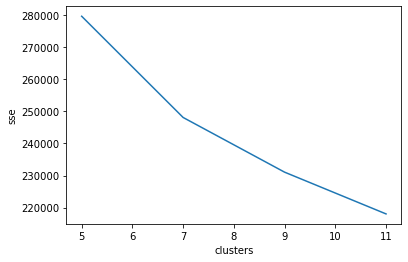

In [43]:
sns.lineplot(x='clusters', y='sse', data=sse_pd)

In [47]:
seven_clusters_result = results[1]
seven_clusters_centroids = seven_clusters_result['centroides']
seven_clusters_centroids

array([[ 0.11175414,  0.48802543, -0.06490258,  0.89588824,  0.18184211,
         0.53466499, -0.27380551,  1.31896882, -0.37813222,  1.16908572,
        -0.30575364,  0.69113189, -0.22649128,  1.08219644, -0.70574833,
         1.06983377, -0.5007236 ,  1.18321984, -0.62357939,  1.07832561,
        -0.17121151, -0.51907588,  0.55204228,  0.82035698,  0.07289113,
         0.18857708,  0.        , -0.97611697, -0.56377383],
       [-0.02139475, -0.06829776, -0.17423179, -0.90017255, -0.42771611,
        -0.58425788, -0.19366767, -0.97572351, -0.06132851, -0.9775375 ,
        -0.25584757, -0.40041203, -0.32379064, -0.44185657,  0.02286648,
        -1.02823656,  0.14886752, -0.90065734, -0.04905497, -0.85148517,
        -0.36104718,  0.66554669, -0.25100547, -0.25084181,  0.00847291,
        -0.58423459,  0.        ,  0.20648615,  0.33258732],
       [-0.24754042, -0.12824213, -1.45108857,  0.96345   , -0.78816273,
         0.81541713, -1.31592393,  1.41821177, -1.50415057,  1.39390764,
  

¿Cuáles son las coordenadas correspondientes a la variable RH_3 de los centroides correspondientes a los grupos generados?

In [50]:
rh3_index = energy_dataset.columns.get_loc('rh_3')
seven_clusters_centroids[:,rh3_index]

array([ 1.31896882, -0.97572351,  1.41821177, -0.26631164,  1.02248081,
       -0.11077166, -0.77962421])

In [52]:
seven_clusters_labels = seven_clusters_result['labels']
seven_clusters_labels

array([0, 0, 0, ..., 4, 4, 4])

In [69]:
energy_dataset['cluster'] = seven_clusters_labels
energy_dataset['cluster'] = energy_dataset.cluster.astype('category')

In [72]:
energy_dataset

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,year,month,day,cluster
0,60,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,...,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,2016,1,11,0
1,60,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,...,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,2016,1,11,0
2,50,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,...,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,2016,1,11,0
3,50,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,...,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,2016,1,11,0
4,60,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,...,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,2016,1,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,...,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,2016,5,27,4
19731,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,...,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,2016,5,27,4
19732,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,...,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,2016,5,27,4
19733,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,...,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,2016,5,27,4


In [76]:
energy_dataset.groupby(by='cluster', as_index=False)['appliances'].count().rename(columns={'appliances': 'count'})

,cluster,count
0,0,2890
1,1,3950
2,2,1390
3,3,3866
4,4,1406
5,5,3768
6,6,2465


Bloxplot for each group by variable

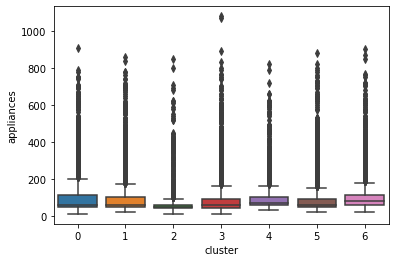

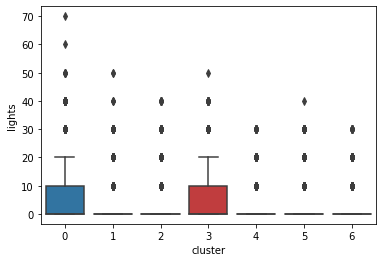

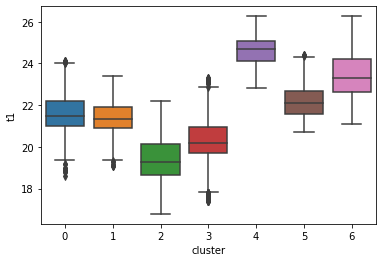

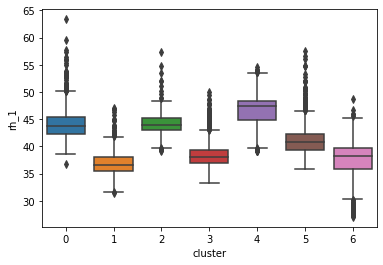

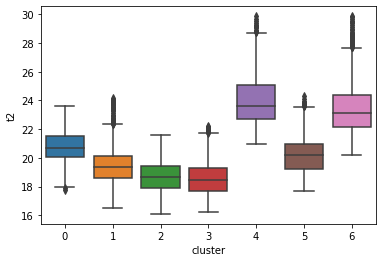

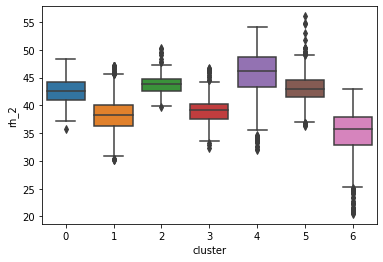

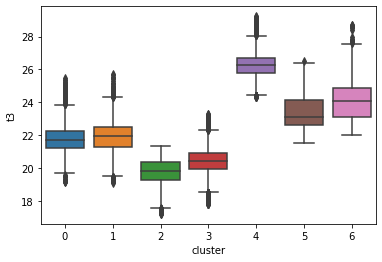

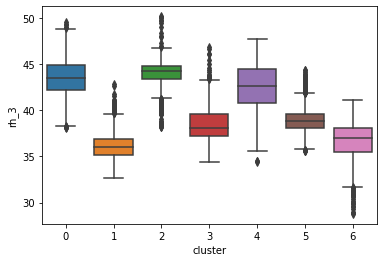

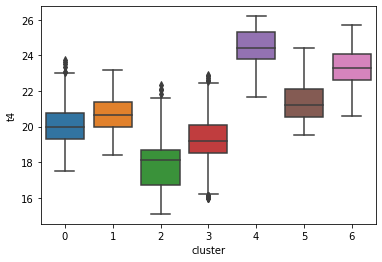

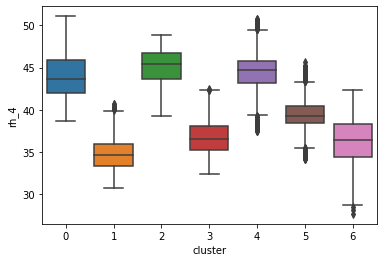

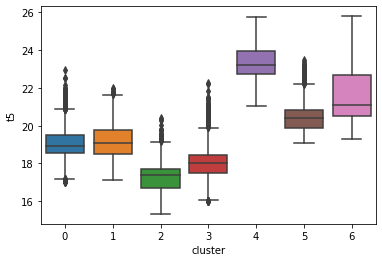

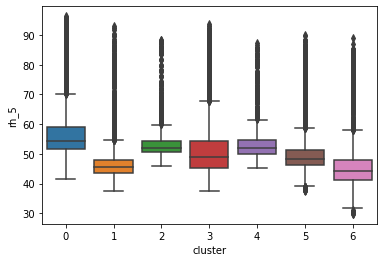

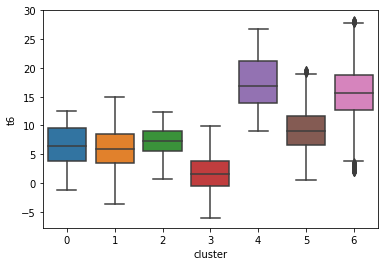

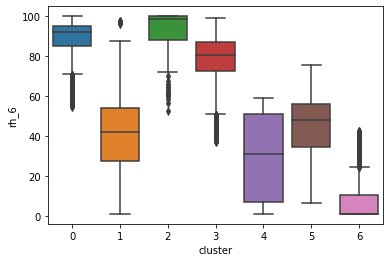

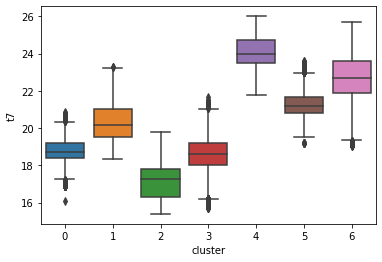

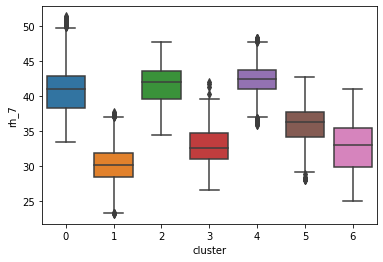

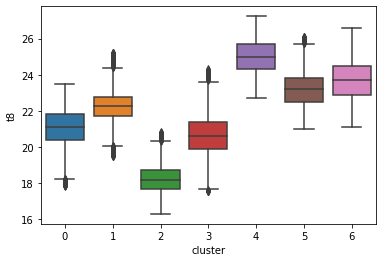

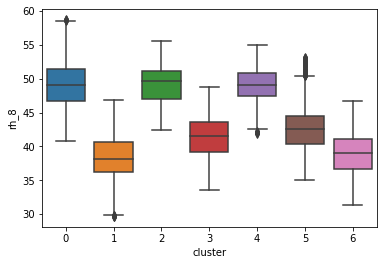

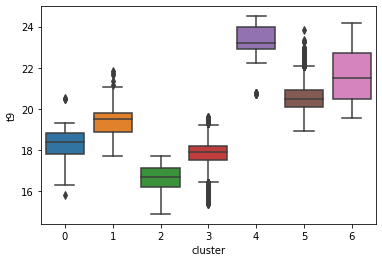

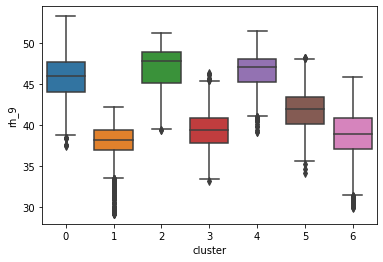

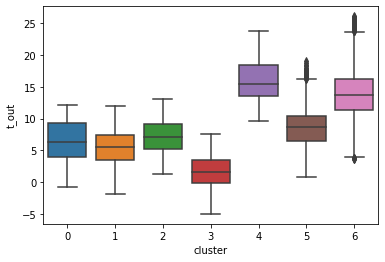

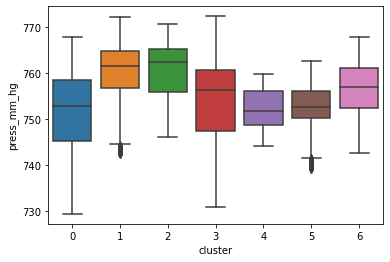

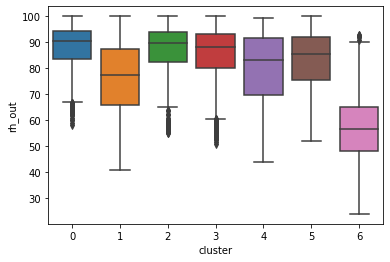

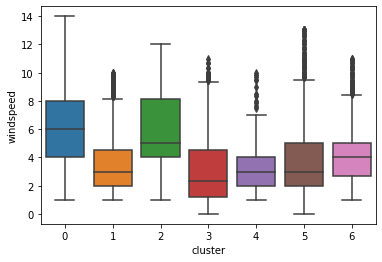

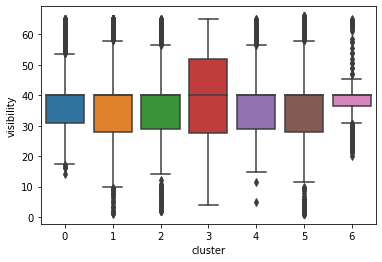

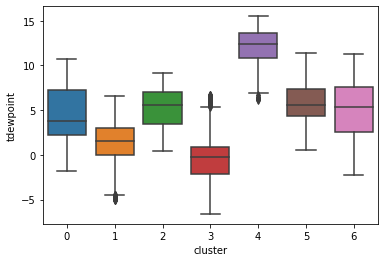

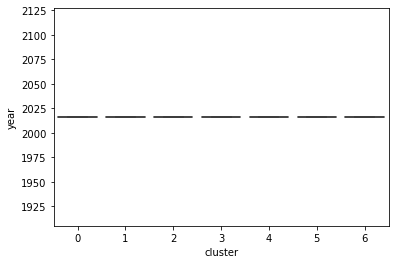

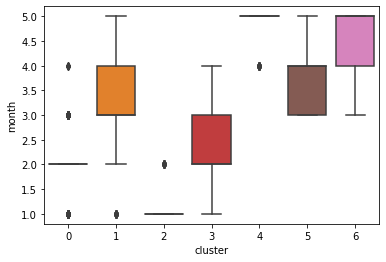

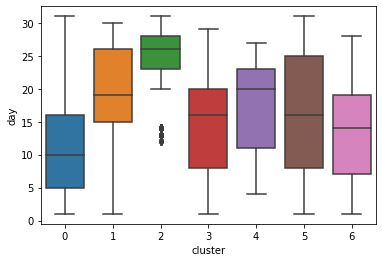

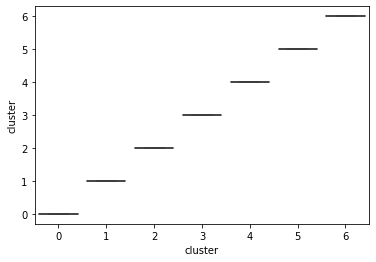

In [63]:
for col in energy_dataset.columns.values:
    plt.clf()
    a = sns.boxplot(x='cluster',y=col, data=energy_dataset)
    plt.show(a)

<AxesSubplot:xlabel='t1', ylabel='t2'>

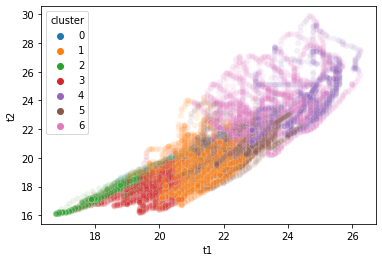

In [68]:
sns.scatterplot(x="t1", y="t2", data=energy_dataset, hue="cluster", alpha=0.1)